torch.Size([11]) torch.Size([11])


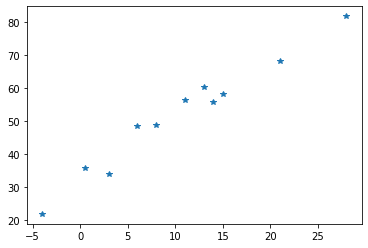

In [1]:
import numpy as np
import torch as t
from matplotlib import pyplot as plt
x_s =  [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
y_s = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
x_t = t.tensor(x_s)
y_t = t.tensor(y_s)
print(x_t.shape, y_t.shape)
plt.plot(x_s,y_s,'*')
plt.show()

In [2]:
x_n = (x_t - t.mean(x_t))/t.std(x_t)
y_n = (x_n - t.mean(x_n))/t.std(x_n)

In [24]:
# split training - validation
n_samples = x_n.shape[0]
n_val = int(0.4 * n_samples) # 20 % of the samples for validation
shuffled_indices = t.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
print(train_indices, val_indices)

tensor([ 0,  9,  5, 10,  4,  3,  7]) tensor([8, 1, 2, 6])


In [26]:
x_t_2d = x_n.unsqueeze(1)
y_t_2d = y_n.unsqueeze(1)
print(x_t_2d)
print(y_t_2d)

x_t_train = x_t_2d[train_indices,:]
x_t_val   = x_t_2d[val_indices,:]

y_t_train = y_t_2d[train_indices,:]
y_t_val   = y_t_2d[val_indices,:]

print(x_t_train.shape, x_t_train.dtype)
print(y_t_train.shape, y_t_train.dtype)

tensor([[-1.0856],
        [ 0.3800],
        [ 0.4885],
        [ 1.8998],
        [ 0.0543],
        [-0.2714],
        [-0.8142],
        [-1.5741],
        [-0.4885],
        [ 0.2714],
        [ 1.1399]])
tensor([[-1.0856],
        [ 0.3800],
        [ 0.4885],
        [ 1.8998],
        [ 0.0543],
        [-0.2714],
        [-0.8142],
        [-1.5741],
        [-0.4885],
        [ 0.2714],
        [ 1.1399]])
torch.Size([7, 1]) torch.float32
torch.Size([7, 1]) torch.float32


In [5]:
def training_loop(n_epochs, optimizer, model, loss_fn, 
                  x_t_train, x_t_val, y_t_train, y_t_val, eps = 0.01):
                  
    for epoch in range(1, n_epochs + 1):
        # forward pass training
        y_p_train  = model(x_t_train)
        loss_train = loss_fn(y_p_train, y_t_train)
        
        # backwards training
        optimizer.zero_grad() 
        loss_train.backward()  # gradients are computed according to the optimization method
        optimizer.step()       # parameters are changed based on the learning rate and gradient

        if epoch == 1 or epoch % 10 == 0:
            y_p_val    = model(x_t_val)
            loss_val   = loss_fn(y_p_val, y_t_val)
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
f" Validation loss {loss_val.item():.4f}")
        if loss_train < eps:
            break;

In [34]:
import torch.nn as nn
import torch.optim as optim # optimization module (SGD)

seq_model = nn.Sequential(
                nn.Linear(1, 13),  # one input and 13 outputs: each output hi = w1i * x + bi
                nn.Sigmoid(),   # activation function f = use Tanh or ReLU or Sigmoid  f(hi)
                nn.Linear(13, 1)) # 13 inputs, one output: y = sum(w2i*f(hi) + b)
seq_model

optimizer = optim.Adam(seq_model.parameters(), lr=1e-2) # try SGD, try other lr

training_loop(n_epochs    = 350,
                optimizer = optimizer,  
                model     = seq_model,
                loss_fn   = nn.MSELoss(), 
                x_t_train = x_t_train, x_t_val= x_t_val, 
                y_t_train = y_t_train, y_t_val = y_t_val,
                eps = 1e-3)

print('output', seq_model(x_t_val))
print('answer', y_t_val)
#print('hidden', seq_model.hidden_linear.weight.grad, seq_model.hidden_linear.weight)

Epoch 1, Training loss 1.7305, Validation loss 0.4168
Epoch 10, Training loss 1.2428, Validation loss 0.3458
Epoch 20, Training loss 0.9487, Validation loss 0.2663
Epoch 30, Training loss 0.6928, Validation loss 0.1622
Epoch 40, Training loss 0.4594, Validation loss 0.1020
Epoch 50, Training loss 0.2586, Validation loss 0.0488
Epoch 60, Training loss 0.1139, Validation loss 0.0112
Epoch 70, Training loss 0.0359, Validation loss 0.0011
Epoch 80, Training loss 0.0095, Validation loss 0.0041
Epoch 90, Training loss 0.0062, Validation loss 0.0099
Epoch 100, Training loss 0.0066, Validation loss 0.0116
Epoch 110, Training loss 0.0060, Validation loss 0.0103
Epoch 120, Training loss 0.0054, Validation loss 0.0084
Epoch 130, Training loss 0.0051, Validation loss 0.0071
Epoch 140, Training loss 0.0049, Validation loss 0.0065
Epoch 150, Training loss 0.0048, Validation loss 0.0064
Epoch 160, Training loss 0.0047, Validation loss 0.0064
Epoch 170, Training loss 0.0046, Validation loss 0.0063
Epo

torch.Size([4, 1])


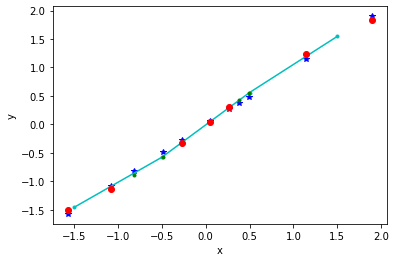

In [35]:
from matplotlib import pyplot as plt
x_sample = t.arange(-1.5, 2.5).unsqueeze(1)
print(x_sample.shape)
#fig = plt.figure(dpi=600)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_n.numpy(), y_n.numpy(), 'b*')
plt.plot(x_sample.numpy(), seq_model(x_sample).detach().numpy(), 'c.-')
plt.plot(x_n[train_indices].numpy(),      seq_model(x_t_train).detach().numpy(),   'ro')
plt.plot(x_n[val_indices].numpy(),      seq_model(x_t_val).detach().numpy(),   'g.')
#plt.plot()

In [14]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)            

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [38]:
from collections import OrderedDict
n_hidden = 13
seq_model2 = nn.Sequential(OrderedDict([
                    ('hidden_linear', nn.Linear(1, n_hidden)),
                    ('hidden_activation', nn.Tanh()),
                    ('output_linear', nn.Linear(n_hidden, 1))
                    ]))
seq_model2
optimizer = optim.SGD(seq_model2.parameters(), lr=1e-2) # try SGD, try other lr

training_loop(n_epochs    = 500, 
                optimizer = optimizer,  
                model     = seq_model2,
                loss_fn   = nn.MSELoss(), 
                x_t_train = x_t_train, x_t_val= x_t_val, 
                y_t_train= y_t_train, y_t_val = y_t_val, 
                eps = 1e-3)

print('output', seq_model2(x_t_val))
print('answer', y_t_val)
print('hidden', seq_model2.hidden_linear.weight.grad, seq_model2.hidden_linear.weight)

Epoch 1, Training loss 1.2605, Validation loss 0.3053
Epoch 10, Training loss 0.6788, Validation loss 0.1500
Epoch 20, Training loss 0.3488, Validation loss 0.0671
Epoch 30, Training loss 0.1824, Validation loss 0.0302
Epoch 40, Training loss 0.0984, Validation loss 0.0157
Epoch 50, Training loss 0.0563, Validation loss 0.0116
Epoch 60, Training loss 0.0353, Validation loss 0.0119
Epoch 70, Training loss 0.0250, Validation loss 0.0137
Epoch 80, Training loss 0.0199, Validation loss 0.0157
Epoch 90, Training loss 0.0173, Validation loss 0.0175
Epoch 100, Training loss 0.0160, Validation loss 0.0189
Epoch 110, Training loss 0.0153, Validation loss 0.0199
Epoch 120, Training loss 0.0150, Validation loss 0.0206
Epoch 130, Training loss 0.0147, Validation loss 0.0211
Epoch 140, Training loss 0.0145, Validation loss 0.0213
Epoch 150, Training loss 0.0144, Validation loss 0.0215
Epoch 160, Training loss 0.0142, Validation loss 0.0215
Epoch 170, Training loss 0.0141, Validation loss 0.0215
Epo

torch.Size([40, 1])


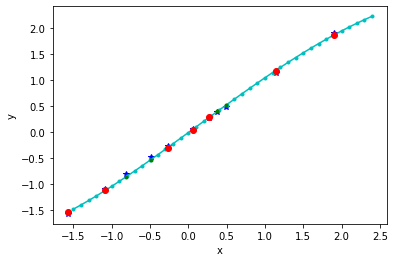

In [53]:
from matplotlib import pyplot as plt
x_sample = t.arange(-1.5, 2.5, 0.1).unsqueeze(1)
print(x_sample.shape)
#fig = plt.figure(dpi=600)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_n.numpy(), y_n.numpy(), 'b*')
plt.plot(x_sample.numpy(), seq_model2(x_sample).detach().numpy(), 'c.-')
plt.plot(x_n[train_indices].numpy(),      seq_model2(x_t_train).detach().numpy(),   'ro')
plt.plot(x_n[val_indices].numpy(),      seq_model2(x_t_val).detach().numpy(),   'g.')
#plt.plot()

In [38]:
for name, param in seq_model2.named_parameters():
    print(name, param.shape, param)

hidden_linear.weight torch.Size([13, 1]) Parameter containing:
tensor([[ 0.1305],
        [-0.5386],
        [ 0.7578],
        [ 0.5143],
        [ 0.7198],
        [ 0.8529],
        [-0.1078],
        [-0.1211],
        [-0.5451],
        [ 0.7771],
        [ 0.0987],
        [-0.7111],
        [ 0.5057]], requires_grad=True)
hidden_linear.bias torch.Size([13]) Parameter containing:
tensor([-0.9648,  0.5353,  0.7620, -0.3512, -0.9700,  0.5850,  0.5121,  0.9163,
        -0.4759,  0.4093, -0.2157, -0.5971,  0.2564], requires_grad=True)
output_linear.weight torch.Size([1, 13]) Parameter containing:
tensor([[ 0.1639, -0.1157,  0.0566,  0.1911,  0.2492, -0.0142,  0.2259,  0.2594,
          0.1356,  0.1838, -0.2621,  0.0424,  0.0928]], requires_grad=True)
output_linear.bias torch.Size([1]) Parameter containing:
tensor([0.2453], requires_grad=True)


In [47]:
seq_model2.output_linear.bias

Parameter containing:
tensor([-0.0764], requires_grad=True)

In [50]:
# with sigmoid is pretty bad - it overfits easily
# with ReLU learns a line much faster
n_hidden = 3
seq_model3 = nn.Sequential(OrderedDict([
                    ('hidden_linear', nn.Linear(1, n_hidden)),
                    ('hidden_activation', nn.ReLU()),
                    ('output_linear', nn.Linear(n_hidden, 1))
                    ]))
optimizer = optim.Adam(seq_model3.parameters(), lr=1e-2) # try SGD, try other lr

training_loop(n_epochs    = 500, 
                optimizer = optimizer,  
                model     = seq_model3,
                loss_fn   = nn.MSELoss(), 
                x_t_train = x_t_train, x_t_val= x_t_val, 
                y_t_train= y_t_train, y_t_val = y_t_val,
                eps = 1e-3)

print('output', seq_model3(x_t_val))
print('answer', y_t_val)
print('hidden', seq_model3.hidden_linear.weight.grad, seq_model3.hidden_linear.weight)

Epoch 1, Training loss 1.6893, Validation loss 0.5695
Epoch 10, Training loss 1.3264, Validation loss 0.4167
Epoch 20, Training loss 1.1034, Validation loss 0.2991
Epoch 30, Training loss 0.9410, Validation loss 0.2031
Epoch 40, Training loss 0.8108, Validation loss 0.1328
Epoch 50, Training loss 0.7106, Validation loss 0.0920
Epoch 60, Training loss 0.6339, Validation loss 0.0628
Epoch 70, Training loss 0.5705, Validation loss 0.0407
Epoch 80, Training loss 0.5167, Validation loss 0.0256
Epoch 90, Training loss 0.4699, Validation loss 0.0148
Epoch 100, Training loss 0.4278, Validation loss 0.0079
Epoch 110, Training loss 0.3888, Validation loss 0.0042
Epoch 120, Training loss 0.3513, Validation loss 0.0025
Epoch 130, Training loss 0.3155, Validation loss 0.0017
Epoch 140, Training loss 0.2829, Validation loss 0.0012
Epoch 150, Training loss 0.2533, Validation loss 0.0009
Epoch 160, Training loss 0.2264, Validation loss 0.0007
Epoch 170, Training loss 0.2021, Validation loss 0.0005
Epo

torch.Size([40, 1])


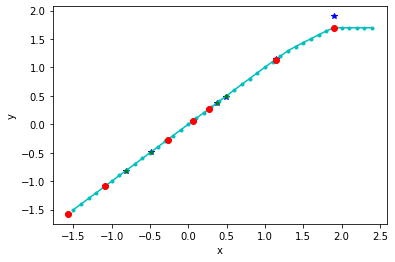

In [52]:
from matplotlib import pyplot as plt
x_sample = t.arange(-1.5, 2.5, 0.1).unsqueeze(1)
print(x_sample.shape)
#fig = plt.figure(dpi=600)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_n.numpy(), y_n.numpy(), 'b*')
plt.plot(x_sample.numpy(), seq_model3(x_sample).detach().numpy(), 'c.-')
plt.plot(x_n[train_indices].numpy(),      seq_model3(x_t_train).detach().numpy(),   'ro')
plt.plot(x_n[val_indices].numpy(),      seq_model3(x_t_val).detach().numpy(),   'g.')
#plt.plot()

torch.Size([35, 1])


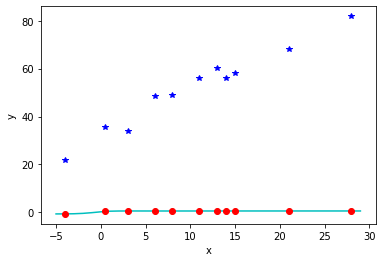

In [48]:

from matplotlib import pyplot as plt
x_sample = t.arange(-5., 30.).unsqueeze(1)
print(x_sample.shape)
#fig = plt.figure(dpi=600)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_t.numpy(), y_t.numpy(), 'b*')
plt.plot(x_sample.numpy(), seq_model2(x_sample).detach().numpy(), 'c-')
plt.plot(x_t.numpy(),      seq_model2(x_t_2d).detach().numpy(),   'ro')

In [88]:
n_hidden1 = 2
#n_hidden2 = 2
seq_model3 = nn.Sequential(OrderedDict([
                    ('hidden_linear1',   nn.Linear(1, n_hidden1)),
                    ('hidden_activation1', nn.ReLU()),
                    #('hidden_linear2', nn.Linear(n_hidden1, n_hidden2)),
                    #('hidden_activation2', nn.Sigmoid()),
                    ('output_linear', nn.Linear(n_hidden1, 1))
                    ]))
optimizer = optim.Adam(seq_model3.parameters(), lr=1e-2) # try SGD, SGD+momentum try other lr

training_loop(n_epochs    = 10000, 
                optimizer = optimizer,  
                model     = seq_model3,
                loss_fn   = nn.MSELoss(), 
                x_t_train = x_t_train, x_t_val= x_t_val, 
                y_t_train= y_t_train, y_t_val = y_t_val)

print('output', seq_model2(x_t_val))
print('answer', y_t_val)
#print('hidden', seq_model3.hidden_linear1.weight.grad, seq_model3.hidden_linear2.weight.grad)

Epoch 1, Training loss 2901.1304, Validation loss 3336.4207
Epoch 1000, Training loss 1363.0632, Validation loss 1539.1550
Epoch 2000, Training loss 631.9279, Validation loss 632.0193
Epoch 3000, Training loss 319.8688, Validation loss 224.0979
Epoch 4000, Training loss 143.2617, Validation loss 68.7979
Epoch 5000, Training loss 72.7018, Validation loss 18.4440
Epoch 6000, Training loss 40.2303, Validation loss 6.6396
Epoch 7000, Training loss 23.2064, Validation loss 6.6893
Epoch 8000, Training loss 14.5123, Validation loss 9.8854
Epoch 9000, Training loss 10.4630, Validation loss 12.8697
Epoch 10000, Training loss 8.8152, Validation loss 14.7994
output tensor([[0.5330],
        [0.5222],
        [0.5308],
        [0.5214]], grad_fn=<AddmmBackward>)
answer tensor([[68.4000],
        [48.4000],
        [58.2000],
        [48.9000]])


torch.Size([35, 1])


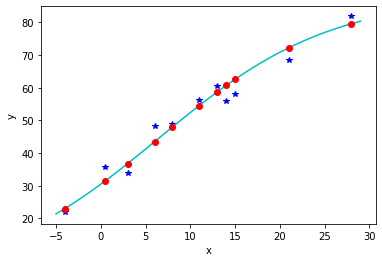

In [90]:
from matplotlib import pyplot as plt
x_sample = t.arange(-5., 30.).unsqueeze(1)
print(x_sample.shape)
#fig = plt.figure(dpi=600)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_t.numpy(), y_t.numpy(), 'b*')
plt.plot(x_sample.numpy(), seq_model3(x_sample).detach().numpy(), 'c-')
plt.plot(x_t.numpy(),      seq_model3(x_t_2d).detach().numpy(),   'ro')

In [21]:
# Starting point classification = try an example of classification error
import torch as t
import torch.nn as nn
import torch.optim as optim
import numpy as np
from matplotlib import pyplot as plt
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler

mean1, sigma1 = 0, 1
mean2, sigma2 = 2, 2

samples= np.random.normal(mean1, sigma1, (100,2))
samples= np.append(samples, np.random.normal(mean2, sigma2, (100,
2)), axis = 0)
#normalize data (x- mean)/std
scaler = StandardScaler()
samples = scaler.fit_transform(samples)

# add labels for 0 and 1 class
nr_samples = samples.shape[0]
label = np.ones((nr_samples,1), dtype = int)
print(samples.shape)
print(label.shape)
label[:99] = 0
label[100:] = 1
# add the label to the samples
samples_label = np.append(samples, label, axis = 1)
print(samples_label.shape)
print(samples_label[:5,:])

(200, 2)
(200, 1)
(200, 3)
[[-1.32647301 -0.29545182  0.        ]
 [-1.11627776 -1.08043674  0.        ]
 [-0.62704265 -0.64230973  0.        ]
 [-0.7119615  -0.97929019  0.        ]
 [-0.46951097 -0.71943885  0.        ]]


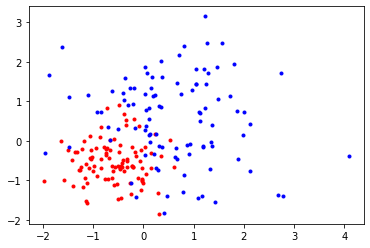

In [22]:
# plot the samples
plt.plot(samples[0:100,0], samples[0:100,1],'r.')
plt.plot(samples[100:-1,0], samples[100:-1,1],'b.')

In [23]:
# shuffle the data points 
np.random.shuffle(samples_label)
print(samples_label[:5,:])

x_all = samples_label[:,:2]
y_all = samples_label[:,-1]

[[-0.8500133   0.7289102   1.        ]
 [-0.16475777 -0.27897441  0.        ]
 [-1.25263487 -0.73490123  0.        ]
 [-0.15070116 -0.38751278  0.        ]
 [-0.66727912  0.01166482  0.        ]]


In [24]:
# training and validation data
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_all, y_all, test_size=.2, train_size=.8, random_state = None, shuffle=True, stratify=None)
print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)


(160, 2) (40, 2)
(160,) (40,)


In [25]:
# convert to tensors
x_t_train = t.from_numpy(x_train).float()
x_t_val   = t.from_numpy(x_val).float()
y_t_train = t.flatten(t.from_numpy(y_train).long())  # output needed to be long not double, not one hot encoding
y_t_val = t.flatten(t.from_numpy(y_val).long())

y_t_val.shape

torch.Size([40])

In [26]:
# build a classification network 
n_hidden1 = 10
seq_model4 = nn.Sequential(OrderedDict
                 ([
                    ('hidden_linear1', nn.Linear(2, n_hidden1)),
                    ('hidden_activation1', nn.Tanh()),
                    #('hidden_linear2', nn.Linear(n_hidden1, n_hidden2)),
                    #('hidden_activation2', nn.Sigmoid()),
                    ('output_softmax', nn.Linear(n_hidden1, 2))
                    #('output_activation', nn.Softmax()) # no softmax with CrossEntropyLoss 0
                    ]))
#seq_model4.hidden_linear1.weight
ym = seq_model4(x_t_val)
print(ym.shape)
loss = nn.CrossEntropyLoss()
loss_train = loss(ym, y_t_val) # y_t_val has to be long
print(loss_train)


torch.Size([40, 2])
tensor(0.6759, grad_fn=<NllLossBackward0>)


In [28]:
optimizer = optim.Adam(seq_model4.parameters(), lr=1e-3) 
# try SGD, try other lr

train_classifier(n_epochs    = 1000,       optimizer = optimizer,  
                model        = seq_model4, loss_fn   = nn.CrossEntropyLoss(),
                x_train      = x_t_train,  x_val     = x_t_val, 
                y_train      = y_t_train,  y_val     = y_t_val )

Epoch 1, Training loss 0.2387, Validation loss 0.3791
Epoch 1000, Training loss 0.2165, Validation loss 0.4209


In [13]:
def train_classifier(n_epochs, 
                      optimizer,
                      model, 
                      loss_fn,
                      x_train, y_train,
                      x_val, y_val
                      ):
                      
    for epoch in range(1, n_epochs + 1):
        # forward pass training
        # randomize the vector of inputs
        ind_random = t.randperm(x_train.shape[0])
        x_train_r  = x_train[ind_random,:]
        y_train_r  = y_train[ind_random]
        
        y_p_train  = model(x_train_r)
        loss_train = loss_fn(y_p_train, y_train_r)      
        
        # backwards training
        optimizer.zero_grad() 
        loss_train.backward()  # gradients are computed and parameters ar changed
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            # forward pass validation
            y_p_val    = model(x_val)
            loss_val   = loss_fn(y_p_val, y_val)
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
f" Validation loss {loss_val.item():.4f}")


In [29]:
soft_max  = t.nn.Softmax(1) 
y_m_train = soft_max(seq_model4(x_t_train)) # y_m normalized with softmax
y_m_train = t.argmax(y_m_train,dim = 1)
print(y_m_train.shape)
y_m_val   = soft_max(seq_model4(x_t_val))
y_m_val   = t.argmax(y_m_val,dim = 1)
correct_pred_val = t.sum(y_m_val == y_t_val)/y_m_val.shape[0]
print("Validation accuracy = ", correct_pred_val)

correct_pred_train = t.sum(y_m_train == y_t_train)/y_m_train.shape[0]
print("Training accuracy = ", correct_pred_train)

torch.Size([160])
Validation accuracy =  tensor(0.8750)
Training accuracy =  tensor(0.8813)


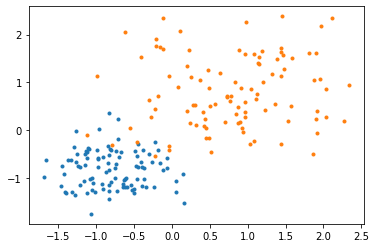

In [19]:
# plot original data
for cat in range(2):
    samples_l = samples_label[samples_label[:,-1] == cat,:-1]
    plt.plot(samples_l[:,0], samples_l[:,1],linestyle = 'none', marker = '.', label = cat)
plt.show()

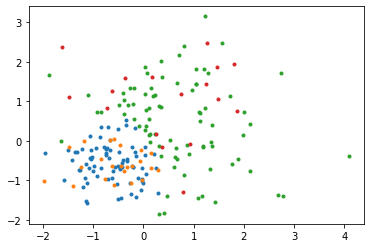

In [30]:
# print results - need to finish this

for label in range(2): # for each class - find the data points in that class and plot them
    x_plot_train = x_t_train[y_m_train == label,:]
    x_plot_val   = x_t_val[y_m_val == label,:]
    plt.plot(x_plot_train[:,0], x_plot_train[:,1],linestyle = 'none', marker = '.', label = label)
    plt.plot(x_plot_val[:,0], x_plot_val[:,1],linestyle = 'none', marker = '.', label = label)

plt.show()
    

#plt.xlabel("x")
#plt.ylabel("y")
#plt.plot(x_t_val.numpy()[:,0], x_t_val.numpy()[:,1], 'b*')
#plt.plot(x_sample.numpy(), seq_model3().detach().numpy(), 'c-')
#plt.plot(x_t.numpy(),      seq_model3(x_t_2d).detach().numpy(),   'ro')

In [313]:
soft_max = t.nn.Softmax(1) 
y_m_train = soft_max(seq_model4(x_t_train)) # y_m normalized
print(y_m[:2,:])
y_pred = t.argmax(y_m,1)
print(y_pred[:2], y_t_train[:2])


tensor([[1.0000e+00, 4.7768e-06],
        [4.9705e-03, 9.9503e-01]], grad_fn=<SliceBackward>)
tensor([0, 1]) tensor([0, 1])


In [377]:
# it works
#train_data = t.cat((x_t_train, y_t_train.unsqueeze(1)),1)
#train_data[:5]
train_data = [(x_t_train[i], y_t_train[i]) for i in range(x_t_train.shape[0])]
#train_data[:5]
trainloader = t.utils.data.DataLoader(train_data, batch_size = 1, shuffle=True)
for x,label in trainloader:  # shuffles the data
    print(x,label[0])

tensor([[1.0732, 0.6015]]) tensor(1)
tensor([[-0.9693, -1.0684]]) tensor(0)
tensor([[-0.0970,  0.2243]]) tensor(1)
tensor([[-0.5212, -0.6084]]) tensor(0)
tensor([[-0.9537, -0.4571]]) tensor(0)
tensor([[ 0.6683, -0.1910]]) tensor(1)
tensor([[-0.6544, -0.7947]]) tensor(0)
tensor([[-0.7144,  0.7833]]) tensor(1)
tensor([[ 0.9559, -1.8449]]) tensor(1)
tensor([[ 1.8968, -0.8463]]) tensor(1)
tensor([[0.8294, 0.9996]]) tensor(1)
tensor([[ 0.0371, -0.5012]]) tensor(0)
tensor([[-0.7731,  0.4865]]) tensor(1)
tensor([[-0.0774, -0.8634]]) tensor(0)
tensor([[ 0.4225, -1.3883]]) tensor(1)
tensor([[-0.3572,  1.2354]]) tensor(1)
tensor([[-0.9829, -0.1979]]) tensor(0)
tensor([[-0.1869, -1.5343]]) tensor(1)
tensor([[-0.3549, -0.2596]]) tensor(0)
tensor([[-0.9089, -0.0688]]) tensor(0)
tensor([[-1.3128,  0.0079]]) tensor(0)
tensor([[2.1145, 0.6298]]) tensor(1)
tensor([[0.6624, 0.6800]]) tensor(1)
tensor([[ 0.1007, -0.4399]]) tensor(0)
tensor([[ 0.1562, -0.4329]]) tensor(1)
tensor([[ 0.9690, -0.8701]]) tens

In [259]:
x =np.array([1,2])
y = np.array([0,1])
x = t.from_numpy(x)
y = t.from_numpy(y)

train_data = t.utils.data.TensorDataset(x, y)
train_loader = t.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
#print(dir(train_loader))
iterator = iter(train_loader)
#print("xr =", data[0])
#print("yr=", data[1])
for xi,yi in iterator:
    print("x= ",xi)
    print("y= ", yi)



[tensor([2, 1]), tensor([1, 0])]
